# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

# Для работы, необходимо добавить в папку с notebook файл с данными  https://data.worldbank.org/data-catalog/world-development-indicators

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
#import mpl_toolkits.basemap as bm #Doesn't work correct.

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 37 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    #There and everywhere then the euclidian distance is used as a metrics
    def single_linkage(self, C1, C2, X):
        if C1 == C2:
            return np.inf
        labels = self.get_labels()
        ind1 = (labels == C1)
        ind2 = (labels == C2)
        if X[ind1].shape[0] == 0 or X[ind2].shape[0] == 0:
            return np.inf
        return np.square(X[ind1, np.newaxis, :] - X[ind2]).sum(axis=2).min()**(1.0/2)
    
    def complete_linkage(self, C1, C2, X):
        if C1 == C2:
            return np.inf
        labels = self.get_labels()
        ind1 = (labels == C1)
        ind2 = (labels == C2)
        if X[ind1].shape[0] == 0 or X[ind2].shape[0] == 0:
            return np.inf
        return np.square(X[ind1, np.newaxis, :] - X[ind2]).sum(axis=2).max()**(1.0/2)
        
    def average_linkage(self, C1, C2, X):
        if C1 == C2:
            return np.inf
        labels = self.get_labels()
        ind1 = (labels == C1)
        ind2 = (labels == C2)
        if X[ind1].shape[0] == 0 or X[ind2].shape[0] == 0:
            return np.inf
        dist_sum = np.sqrt(np.square(X[ind1, np.newaxis, :] - X[ind2]).sum(axis=2)).sum()
        return dist_sum / X[ind1].shape[0] / X[ind2].shape[0]
    
    def get_labels(self):
        return self.labels_seq[self.layer - 1]
                       
    def get_least_clusters(self):
        tmp = self.dist.argmin()
        return tmp / self.dist.shape[0], tmp % self.dist.shape[0]
    
    def fix_dist(self, C1, C2, X):
        self.dist[C2, :] = self.dist[:, C2] = np.inf
        self.dist[:, C1] = self.dist[C1, :] = np.apply_along_axis(\
                                                self.linkage, 0,\
                                                np.array([x for x in xrange(0, X.shape[0])]).reshape(1, -1),\
                                                C1, X)
        
    def __init__(self, **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        if kwargs['linkage'] == 'single-linkage':
            self.linkage = self.single_linkage
        elif kwargs['linkage'] == 'complete-linkage':
            self.linkage = self.complete_linkage
        elif kwargs['linkage'] == 'average-linkage':
            self.linkage = self.average_linkage
        else:
            self.linkage = self.single_linkage
            
        self.k = kwargs['k']
        
        self.layer = 1
        
        
        return
        
    def fit(self, X, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.labels_seq = np.empty([X.shape[0] - self.k + 1, X.shape[0]], dtype=np.int)
        
        self.labels_seq[0] = [x for x in xrange(0, X.shape[0])]
        
        self.dist = np.empty([X.shape[0], X.shape[0]], dtype=np.float)
        
        
        self.dist = ss.distance.cdist(XA=X, XB=X, metric='euclidean')
        
        for x in xrange(0, X.shape[0]):
            self.dist[x][x] = np.inf
        
        for ind in xrange(1, X.shape[0] - self.k + 1):
            C1, C2 = self.get_least_clusters()
            C1, C2 = min(C1, C2), max(C1, C2)
            self.labels_seq[ind] = self.labels_seq[ind - 1]
            self.labels_seq[ind, self.labels_seq[ind] == C2] = C1
            self.layer += 1
            self.fix_dist(C1, C2, X)
        
        return self
    
    def predict(self, X):
        #return labels for dividion into self.k clusters
        return self.labels_seq[X.shape[0] - self.k]
    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

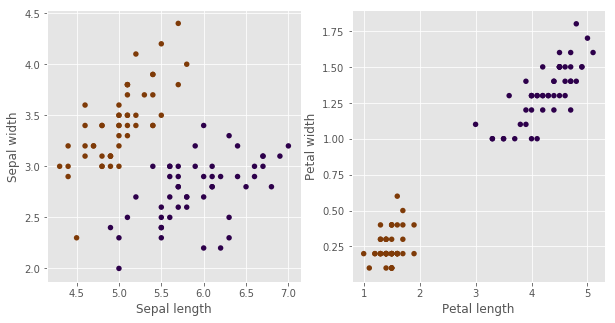

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
pred_iris = Clustering(linkage='average-linkage', k=2)
res = pred_iris.fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, res)

Adjusted Rand index for iris is: 1.00


In [8]:
%%timeit
pred_iris = Clustering(linkage='average-linkage', k=2)
res = pred_iris.fit_predict(x_iris)

10 loops, best of 3: 132 ms per loop


In [9]:
# from line_profiler import LineProfiler

# profiler.add_function(pred_iris.fit_predict)
# profiler.add_function(pred_iris.average_linkage)
# profiler.add_function(pred_iris.fix_dist)
# profiler.add_function(pred_iris.fit)
# profiler.runcall(pred_iris.fit_predict, x_iris)
# profiler.print_stats()

In [10]:
%%timeit
pred_iris_skl = AgglomerativeClustering(linkage='average', n_clusters=2)
res_skl = pred_iris_skl.fit_predict(x_iris)

The slowest run took 47.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 264 µs per loop


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [11]:
## Задание 2
def silhouette(x, y, i, Ck):
    ai = np.apply_along_axis(np.linalg.norm, 1, x[y == Ck] - x[i]).sum() / x[y == Ck].shape[0]
    bi = np.inf
    for t in np.unique(y):
        if t != Ck and x[y == t].shape[0]:
            tmp = np.apply_along_axis(np.linalg.norm, 1, x[y == t] - x[i]).sum() / x[y == t].shape[0]
            if tmp < bi:
                bi = tmp
    return (bi - ai) / max(ai, bi)

def quality(x, y, method):
    """
    Implement quality criterion of your choice
    """
    #radius
    if method == 'silhouette':
        silh = 0.0
        for i in xrange(0, x.shape[0]):
            silh += silhouette(x, y, i, y[i])
        return silh / x.shape[0]
    elif method == 'radius':
        rds_sum = 0.0
        num = 0
        for i in xrange(0, x.shape[0]):
            if x[y == i].shape[0]:
                cnt = x[y == i].sum(axis=0) / x[y == i].shape[0]
                rds_sum += np.apply_along_axis(np.linalg.norm, 1, x[y == i] - cnt).max()
                num += 1
        return rds_sum / num
    else:
        return 0.51

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [12]:
from sklearn.metrics import silhouette_score

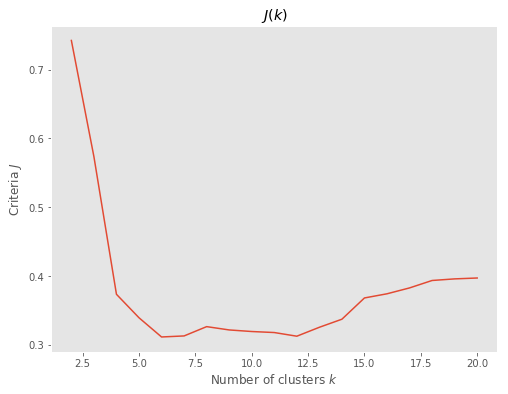

In [13]:
ks = range(2, 21)
criteria = np.zeros(len(ks))
criteria1 = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(linkage='complete-linkage', k=k)
    y = cls.fit_predict(x_iris)
    criteria[i] = quality(x_iris, y, 'silhouette')
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [14]:
## Задание 3
countries = pd.read_csv('WDIData.csv')

In [15]:
tmp1 = countries.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

In [16]:
tmp2 = tmp1['2008'].fillna(tmp1.mean(axis=1))

In [17]:
countries['2008'] = tmp2

In [18]:
countries_2008 = countries[['Country Code', '2008']]

In [19]:
country_codes = np.array(countries_2008['Country Code'].unique())
code_to_name = dict(countries[['Country Code', 'Country Name']].drop_duplicates().values)

In [20]:
country_data = np.empty([country_codes.shape[0], countries.shape[0] / country_codes.shape[0]], np.float)
country_data_no_nan = np.empty([country_codes.shape[0], countries.shape[0] / country_codes.shape[0]], np.float)
country_data_no_nan_non_norm = np.empty([country_codes.shape[0], countries.shape[0] / country_codes.shape[0]], np.float)

In [21]:
for ind, name in enumerate(country_codes):
    country_data[ind] = countries_2008[countries_2008['Country Code'] == name]['2008'].values

In [22]:
col_mean = np.nanmean(country_data,axis=0)
inds = np.where(np.isnan(country_data))
country_data_no_nan_non_norm[inds]=np.take(col_mean,inds[1])

In [23]:
country_data_no_nan_non_norm_std_dev = country_data_no_nan_non_norm.std(axis=0)
country_data_no_nan_non_norm_std_dev[country_data_no_nan_non_norm_std_dev == 0] = 1
country_data_no_nan = (country_data_no_nan_non_norm - country_data_no_nan_non_norm.mean(axis=0)) / country_data_no_nan_non_norm_std_dev

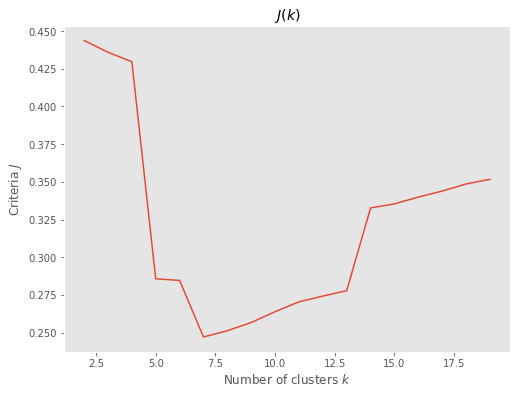

In [24]:
ks = range(2, 20)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = AgglomerativeClustering(n_clusters=k, linkage='complete')
    y = cls.fit_predict(country_data_no_nan)
    criteria[i] = quality(country_data_no_nan, y, 'silhouette')
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [25]:
num_countries_clust = 14

In [26]:
countr_clust = Clustering(linkage='complete-linkage', k=num_countries_clust)
countr_res = countr_clust.fit_predict(country_data_no_nan)

In [27]:
countr_clust_skl = AgglomerativeClustering(n_clusters=num_countries_clust, linkage='complete')
countr_res_skl = countr_clust_skl.fit_predict(country_data_no_nan)

In [28]:
smt.adjusted_rand_score(countr_res, countr_res_skl)

1.0

In [29]:
clusters = np.empty([num_countries_clust], dtype=np.object)

In [30]:
for ind, label in enumerate(np.unique(countr_res)):
    clusters[ind] = country_codes[countr_res == label]

In [31]:
for ind, label in enumerate(clusters):
    print '####################'
    print 'Cluster ', ind + 1
    for code in clusters[ind]:
        print code_to_name[code]
    print '####################'

####################
Cluster  1
Arab World
Caribbean small states
Central Europe and the Baltics
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (excluding high income)
East Asia & Pacific (IDA & IBRD countries)
Euro area
Europe & Central Asia
Europe & Central Asia (excluding high income)
Europe & Central Asia (IDA & IBRD countries)
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
High income
IBRD only
IDA & IBRD total
IDA blend
IDA only
IDA total
Late-demographic dividend
Latin America & Caribbean
Latin America & Caribbean (excluding high income)
Latin America & the Caribbean (IDA & IBRD countries)
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle East & North Africa
Middle East & North Africa (excluding high income)
Middle East & North Africa (IDA & IBRD countries)
Middle income
North America
OECD members
Other small states
Pacific island small states
Post-demographic

In [32]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

X_reduced = TruncatedSVD(n_components=264, random_state=0).fit_transform(country_data_no_nan)

In [33]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2, n_iter=5000).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 264 samples in 0.001s...
[t-SNE] Computed neighbors for 264 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 264 / 264
[t-SNE] Mean sigma: 8.444528
[t-SNE] Computed conditional probabilities in 0.032s
[t-SNE] Iteration 50: error = 56.8426285, gradient norm = 0.5196021 (50 iterations in 0.195s)
[t-SNE] Iteration 100: error = 59.2939949, gradient norm = 0.5044613 (50 iterations in 0.163s)
[t-SNE] Iteration 150: error = 58.1130219, gradient norm = 0.5065492 (50 iterations in 0.152s)
[t-SNE] Iteration 200: error = 57.2100639, gradient norm = 0.5251210 (50 iterations in 0.144s)
[t-SNE] Iteration 250: error = 57.0848122, gradient norm = 0.5346518 (50 iterations in 0.167s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.084812
[t-SNE] Iteration 300: error = 0.5445948, gradient norm = 0.0061562 (50 iterations in 0.137s)
[t-SNE] Iteration 350: error = 0.4746791, gradient norm = 0.0105022 

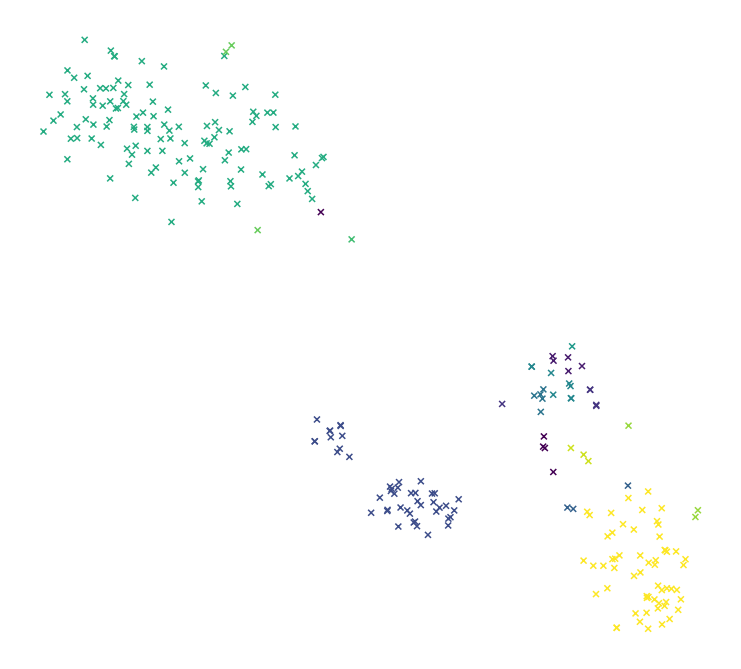

In [34]:
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=countr_res_skl, marker="x")

## Задание 4  
Можно заметить, что определились 2 крупные группы объектов:  
   * **Cluster 6** - самые богатые и развитые страны (преимущественно европейские)  
   * **Cluster 3** - "развивающиеся" страны, менее богатые, чем страны 6-го кластера  
   
Также определился кластер - **Cluster 2** - объект Not classified  

Можно идентифицировать кластеры:  

   * **Cluster 5** - страны-карлики  
   * **Cluster 11** - самые отсталые/бедные страны  
   * **Cluster 7, 8** - островные государства, являющиеся заморскими/отделёнными террирориями "богатых" стран  
   * **Cluster 4, 9, 10, 12** - преимущественно островные государства, в основном, слабо развитые/бедные  
   
Выделяется, также, крупный кластер - **Cluster 1** - состоит, в основном, из усредрённых показателей по различным группам стран. Можно предположить, что этот кластер образовался, т.к. усреденние признаков по различным, заранее заданным параметрам, делает объекты, не похожими на отдельные страны.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.